# Data Generator (Backend)

#### Imports

In [1]:
import numpy as np
import pandas as pd
# For Plotting
import matplotlib.pyplot as plt
# For quick standardization
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Generate Data

### The Unknown Function
---
 - 1) $\min\{\exp(\frac{-1}{(1+x)^2}),x+\cos(x)\}$. Reason: Evaluate performance for pasted functions and general badness.
 - 2) $\cos(\exp(-x))$.  Reason: Evaluate performance for non-periodic osculations.
 - 3) $I_{(-\infty,\frac1{2})}$.  Reason: Evaluation performance on a single jump.  
 
 ---

#### Debugging Parameters:

In [6]:
# Option_Function = "nonlocality"
# N_data = 100
# Train_step_proportion = .75
# D=1
# is_visuallty_verbose = True
# Distortion = 0.5
# noise_level = 0.01
# Extrapolation_size = 0.001

#### Get Testing set proportion

In [9]:
Test_set_proportion = np.abs(1-Train_step_proportion)

#### Load "Unknown" Function to Learn

In [12]:
if Option_Function == "nonlocality":
    # Option 1
    def unknown_f(x):
        unknown_out = np.minimum(np.exp(-1/(1+x)**2),x+np.cos(x))
        return unknown_out

if Option_Function == "oscilatory":
    # Option 2
    def unknown_f(x):
        unknown_out = np.cos(np.exp(2+x))
        return unknown_out


if Option_Function == "jumpdiscontinuity":
    # Option 3
    def unknown_f(x):
        unknown_out = np.maximum(0,np.sign(x))
        return unknown_out
    

if Option_Function == "the_nightmare":
    # For fun: The Nightmare
    def unknown_f(x):
        unknown_out = np.minimum(np.exp(-1/(1+x)**2),x+np.cos(x)) + np.cos(np.exp(2+x)) * np.maximum(0,np.sign(x)) + x
        return unknown_out

### Generate Data
#### Generate Testing Dataset

In [14]:
data_x_test = np.sort(np.random.uniform(low=-(1+Extrapolation_size),high=(1+Extrapolation_size),size=N_data))
data_y_test = unknown_f(data_x_test)

#### Generate Training Dataset

In [16]:
# Generate Unaltered Training Data
data_x = np.sort(np.random.uniform(low=-1,high=1,size=N_data))
data_y = unknown_f(data_x)

# Multiplicative Noise (Distoriton/Model Uncertainty)
Mult_noise = np.random.uniform(low=(1-Distortion),high=(1+Distortion),size = data_y.shape[0])
Add_noise = np.random.normal(loc=0,scale = noise_level,size = data_y.shape[0])

# Generate Training Targets
data_y = (data_y*Mult_noise) + Add_noise

#### Create Training and Testing Subsets

### Preprocess

Coerce Data into proper shape.

In [17]:
data_x = pd.DataFrame(data_x)
data_x_test = pd.DataFrame(data_x_test)

Rescale Data

In [18]:
# Initialize Scaler
sc = StandardScaler()

# Preprocess Training Data
data_x = sc.fit_transform(data_x)

# Preprocess Test Data
data_x_test = sc.transform(data_x_test)

*NEU Format - InDeV*

In [19]:
data_NEU = np.concatenate((data_x,data_y.reshape(-1,D)),axis = 1)

## Get Backup of "Raw" data for easy calling later

In [20]:
data_x_raw = data_x
data_x_test_raw = data_x_test

## Plot Data vs. True Function

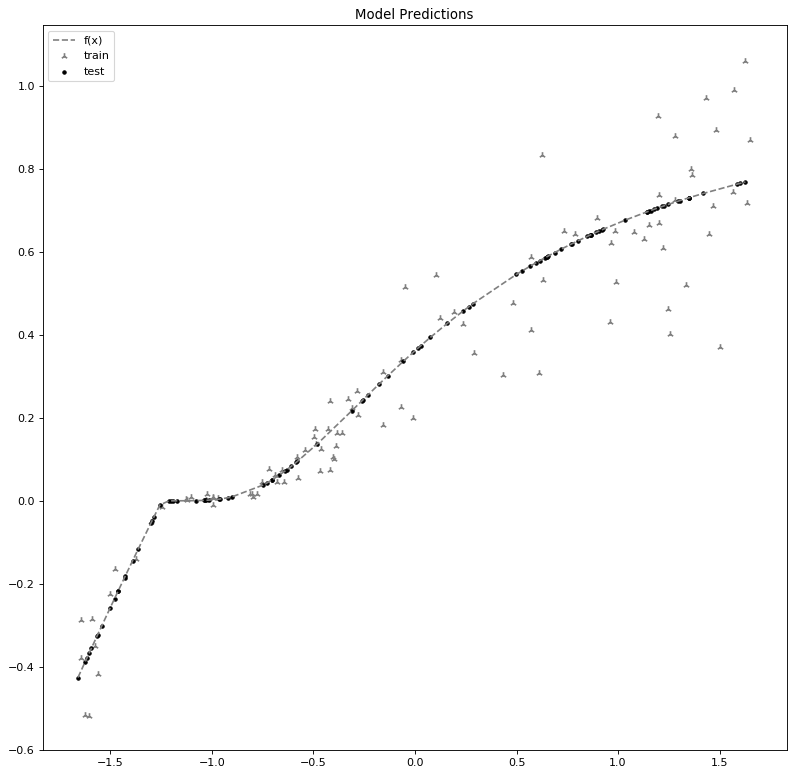

In [21]:
# Initialize Plot #
#-----------------#
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')

# Plot Data
plt.scatter(np.array(data_x).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")
# Show Plot
if is_visuallty_verbose == True:
    plt.show(block=False)

## Report Simulation Configuration to User:

In [22]:
the_facts = "We're plotting the function: " +str(Option_Function)+" with "+str(noise_level)+" additive noise, a distortion/model uncertainty level of "+      str(Distortion)+", and an out-of sample window on either side of the input space of: "+str(Extrapolation_size)+".  We train using "+      str(N_data)+" datapoints and have a test set conisting of "+str(Train_step_proportion)+"% percent of the total generated data."

In [23]:
print("Simulation Confiugration Information:")
print(" ")
print("=========================================================================================================================================================")
print(the_facts)
print("=========================================================================================================================================================")
print(" ")

Simulation Confiugration Information:
 
We're plotting the function: nonlocality with 0.01 additive noise, a distortion/model uncertainty level of 0.5, and an out-of sample window on either side of the input space of: 0.001.  We train using 100 datapoints and have a test set conisting of 0.75% percent of the total generated data.
 


---

**Fin**